In [3]:
#import necessary modules
import pandas as pd

#store the url in a variable and read in the data with `read_csv()`
url = "https://community.watsonanalytics.com/wp-content/uploads/2015/04/WA_Fn-UseC_-Sales-Win-Loss.csv"
sales_data = pd.read_csv(url)
#sales_data.dtypes

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [7]:
#sns.set(style="whitegrid", color_codes=True) # background colour
#sns.set(rc={'figure.figsize':(11.7,8.27)}) # plot size
#sns.countplot('Route To Market',data=sales_data,hue = 'Opportunity Result')
#sns.despine(offset=10, trim=True) # remove margin
#plt.show()

In [8]:
#sns.set(rc={'figure.figsize':(16.7,13.27)})
#sns.violinplot(x="Opportunity Result",y="Client Size By Revenue", hue="Opportunity Result", data=sales_data);
#plt.show()

In [13]:
le = preprocessing.LabelEncoder() # Labelencoder object
sales_data[sales_data.select_dtypes(['object']).columns] = sales_data.select_dtypes(['object']).apply(lambda x: le.fit_transform(x))

In [20]:
#dropping the 'Opportunity Number'and 'Opportunity Result' columns
cols = [col for col in sales_data.columns if col not in ['Opportunity Number','Opportunity Result']]
data = sales_data[cols]

#assigning the Oppurtunity Result column as target
target = sales_data['Opportunity Result']

data_train, data_test, target_train, target_test = train_test_split(data,target, test_size = 0.30, random_state = 10)

In [23]:
#import the necessary module
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

#create Gauss object, train on training data and predict using the testing data
gnb = GaussianNB()
pred = gnb.fit(data_train, target_train).predict(data_test)
#print(pred.tolist())

#print the accuracy score of the model
print("Naive-Bayes accuracy : ",accuracy_score(target_test, pred, normalize = True))

Naive-Bayes accuracy :  0.7590567327409433


In [33]:
#import the necessary modules
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

#create an object of type LinearSVC
svc_model = LinearSVC(random_state=10) #random number generator

#train the algorithm on training data and predict using the testing data
pred = svc_model.fit(data_train, target_train).predict(data_test)

#print the accuracy score of the model
print("LinearSVC accuracy : ",accuracy_score(target_test, pred, normalize = True))

LinearSVC accuracy :  0.7187713602187287


/Users/peaceforlives/anaconda2/envs/test_scikit/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [32]:
#import necessary modules
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

#create object of the lassifier
neigh = KNeighborsClassifier(n_neighbors=3)

#Train the algorithm
neigh.fit(data_train, target_train)

# predict the response
pred = neigh.predict(data_test)

# evaluate accuracy
print ("KNeighbors accuracy score : ",accuracy_score(target_test, pred))

KNeighbors accuracy score :  0.8145505809979494


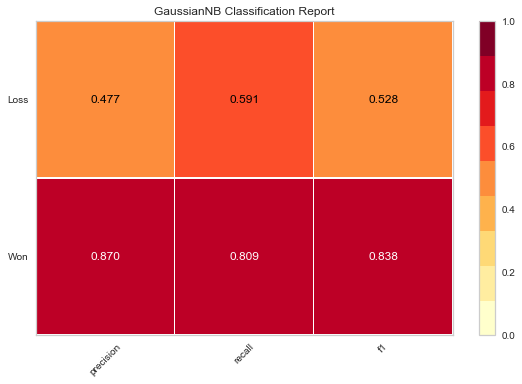

In [35]:
from yellowbrick.classifier import ClassificationReport

# Instantiate the classification model and visualizer
visualizer = ClassificationReport(gnb, classes=['Won','Loss'])

visualizer.fit(data_train, target_train)  # Fit the training data to the visualizer
visualizer.score(data_test, target_test)  # Evaluate the model on the test data
g = visualizer.poof()             # Draw/show/poof the data

# this enables us to visualize the scores across the different target classes.

/Users/peaceforlives/anaconda2/envs/test_scikit/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


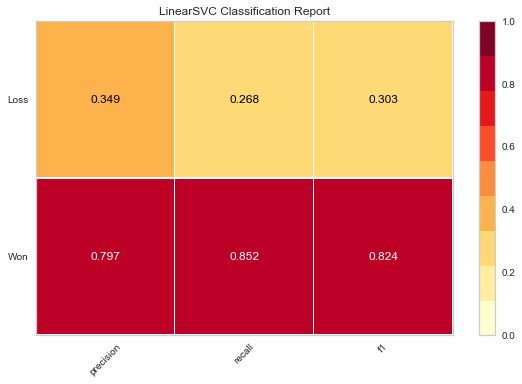

In [36]:
# Instantiate the classification model and visualizer
visualizer = ClassificationReport(svc_model, classes=['Won','Loss'])

visualizer.fit(data_train, target_train)  # Fit the training data to the visualizer
visualizer.score(data_test, target_test)  # Evaluate the model on the test data
g = visualizer.poof()

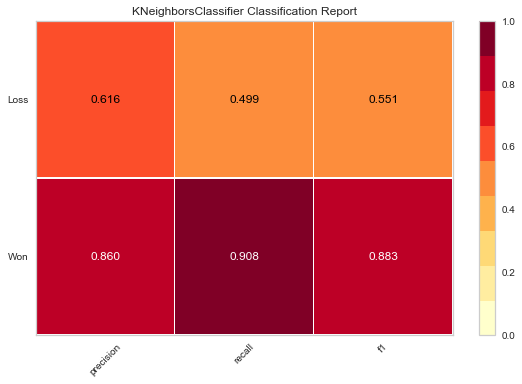

In [37]:
# Instantiate the classification model and visualizer
visualizer = ClassificationReport(neigh, classes=['Won','Loss'])

visualizer.fit(data_train, target_train)  # Fit the training data to the visualizer
visualizer.score(data_test, target_test)  # Evaluate the model on the test data
g = visualizer.poof()             # Draw/show/poof the data